In [1]:
import glob
import os

import matplotlib.pyplot as plt

from Regression import plot_slope_data, RegressionU1SPV

# U 1hPa anomalies regressed onto SPV index

**File read in**

In [2]:
basepath_ua1 = '/home/users/pyb18/CMIP6/zonal/ua1/'
basename_ua1 = 'ua1_Amon_{}_historical_{}_{}'

basepath_ua10 = '/home/users/pyb18/CMIP6/zonal/ua10/'
basename_ua10 = 'ua10_Amon_{}_historical_{}_{}'


pattern = basepath_ua1 + basename_ua1.format('*','*','*')
files = glob.glob(pattern)

model_name_list = []
version_name_list = []
grid_name_list = []

# Find all files that match the above pattern and save the model names, the versions and the grid it was gridded to
for file in files:
    filename = os.path.basename(file).split("/")[-1]
    split_filename = os.path.basename(filename).split("_")
    model_name, version_name, grid_name = split_filename[2], split_filename[-2], split_filename[-1]
    model_name_list.append(model_name)
    version_name_list.append(version_name)
    grid_name_list.append(grid_name)

**Plot all modles individually and together in one big plot**

/tmp/ipykernel_2466/446535923.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax  = plt.subplots()


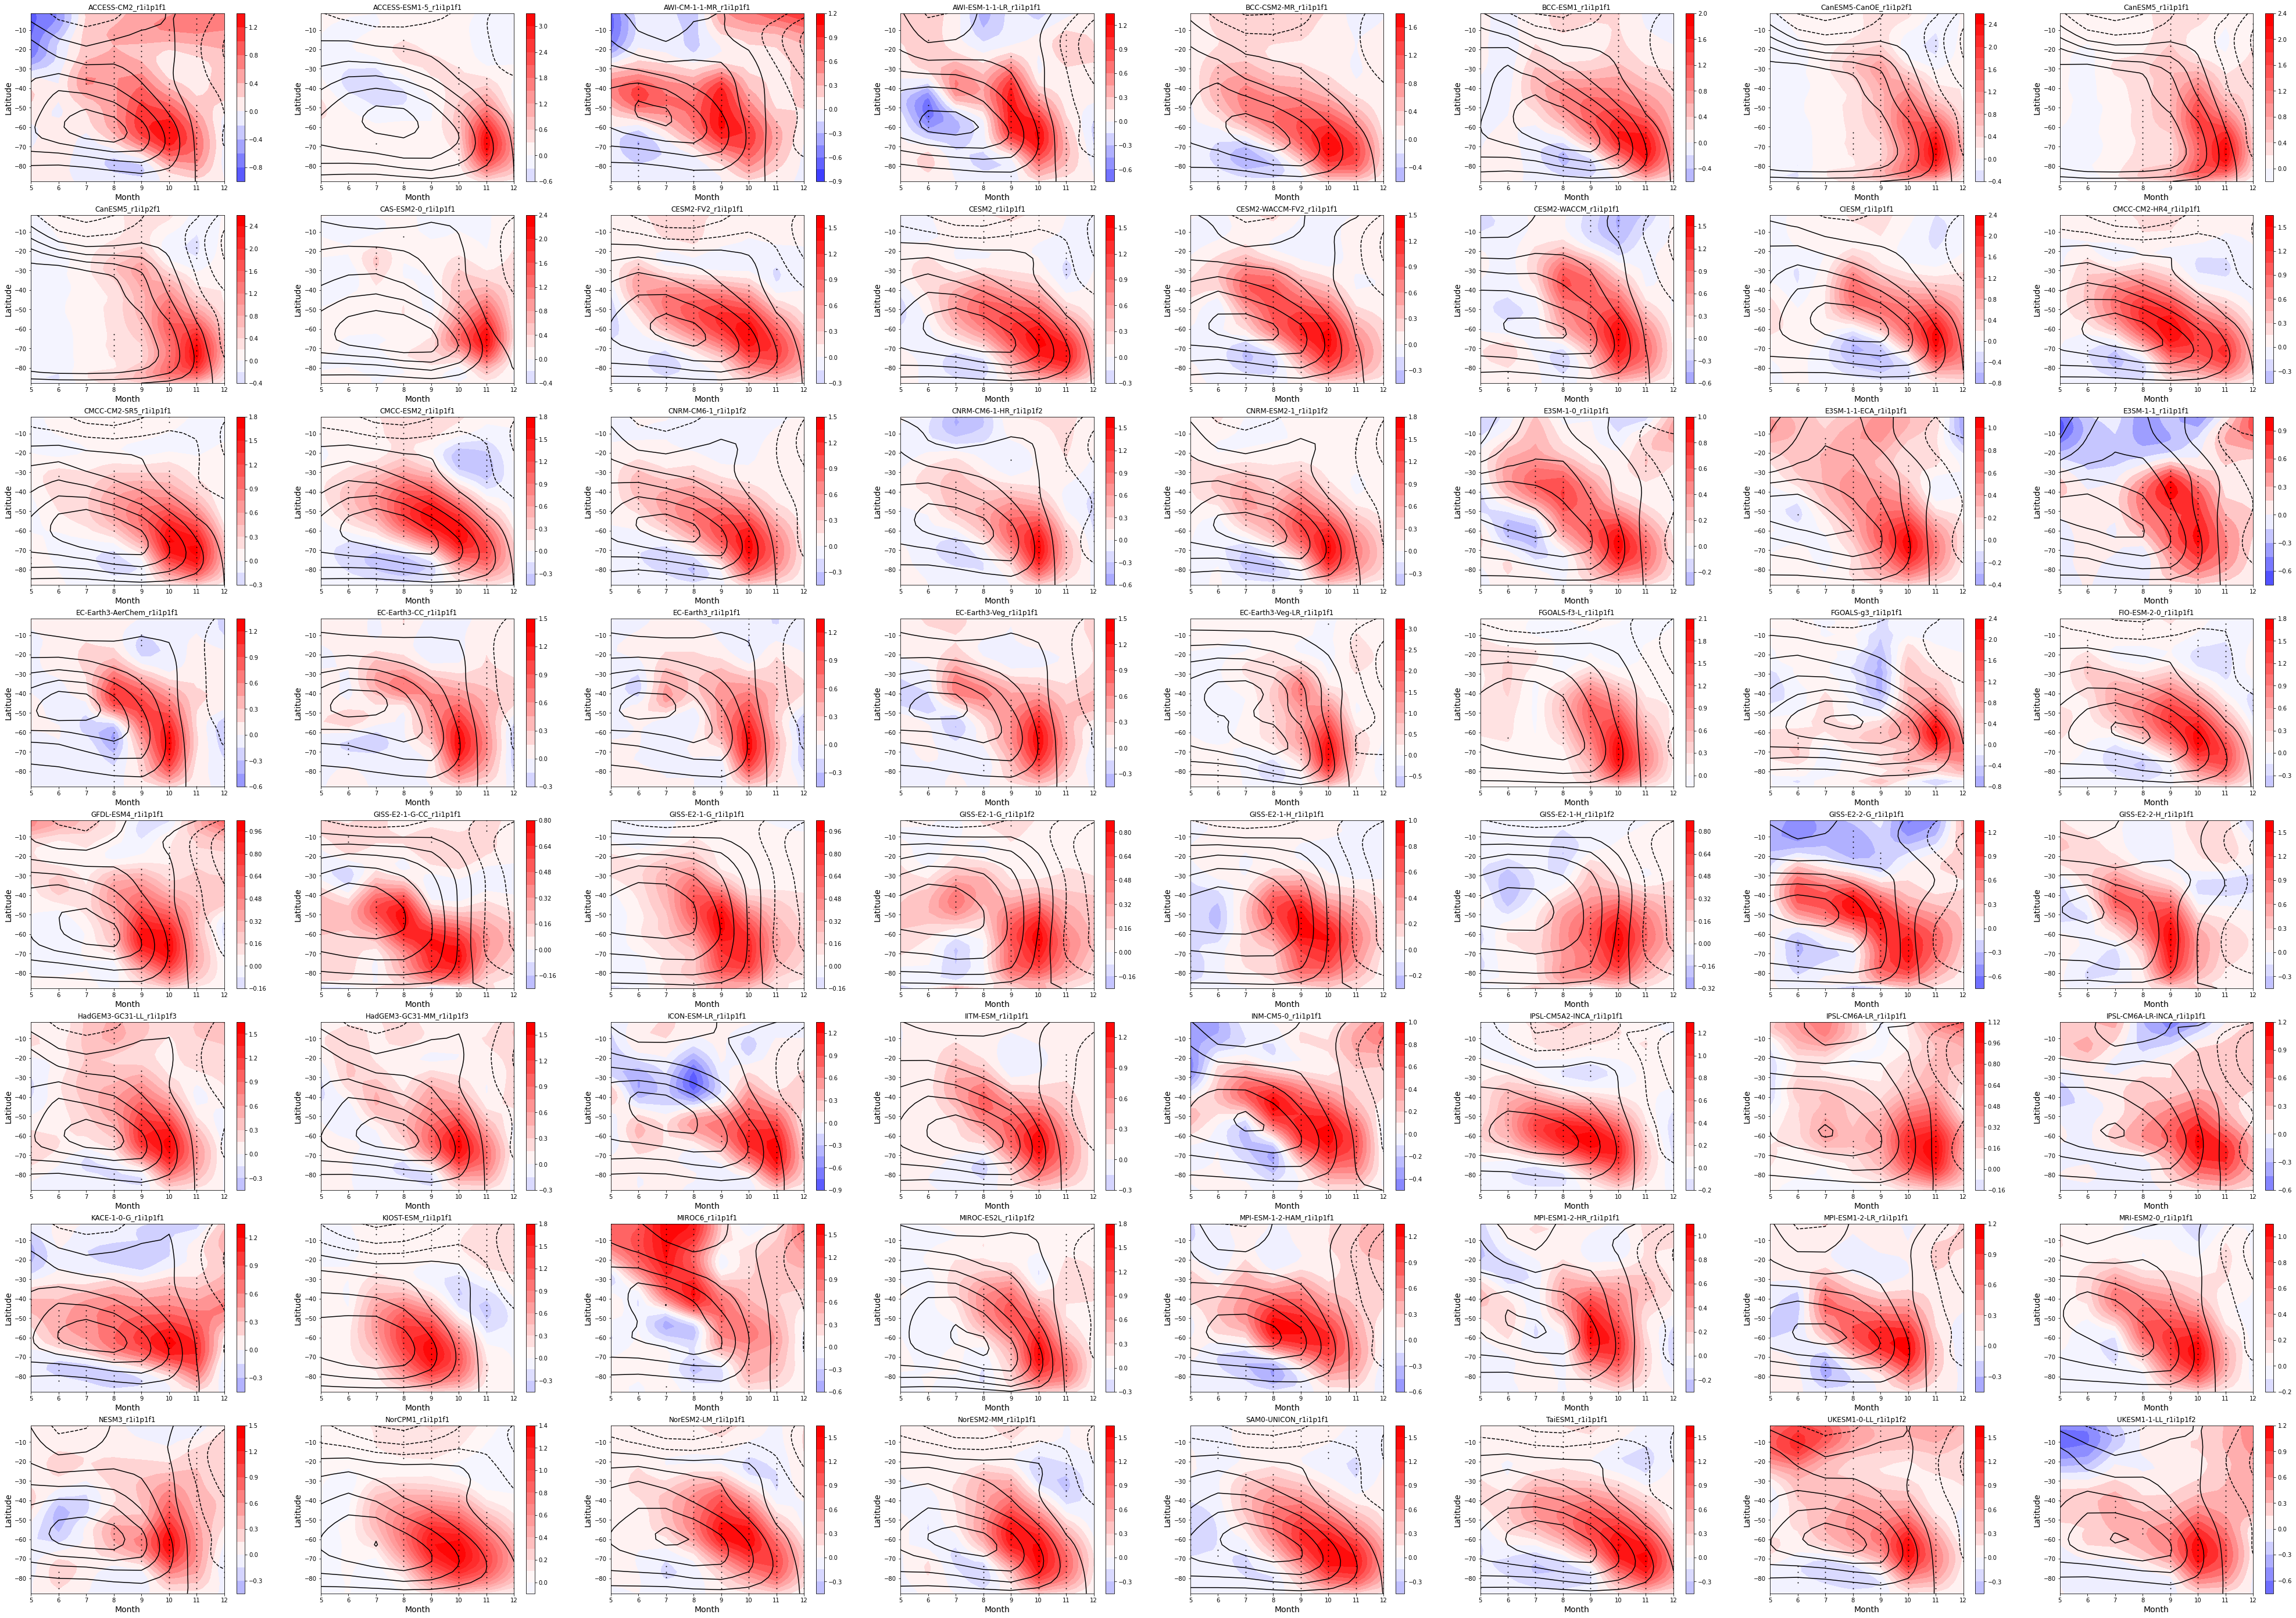

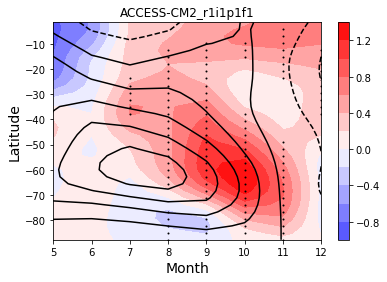

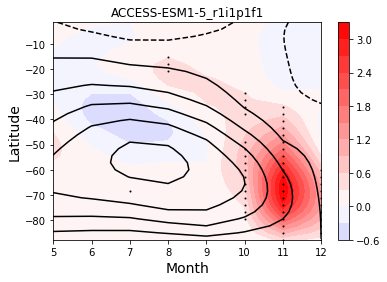

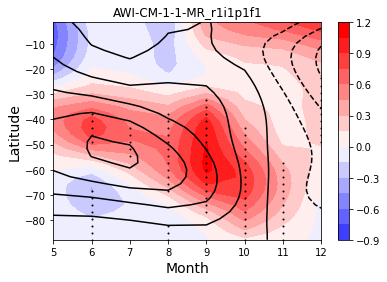

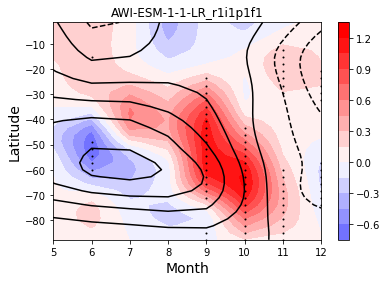

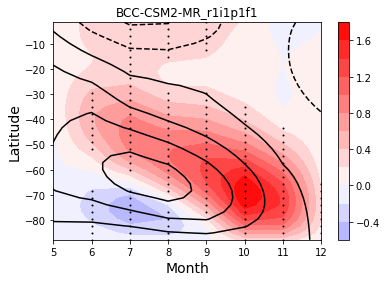

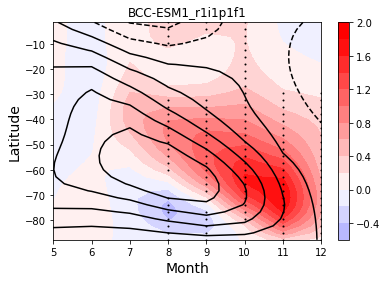

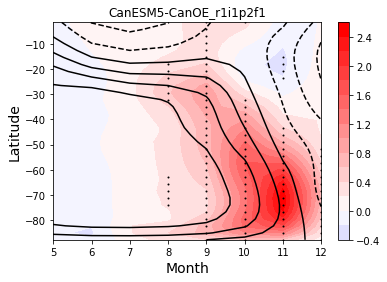

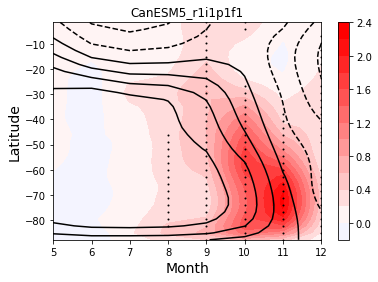

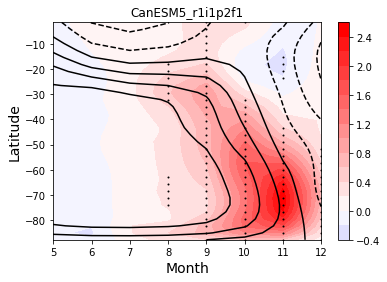

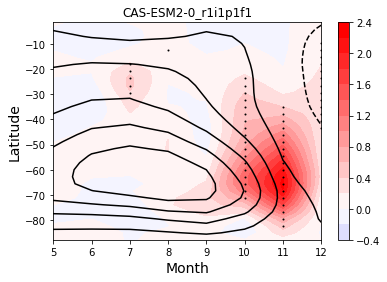

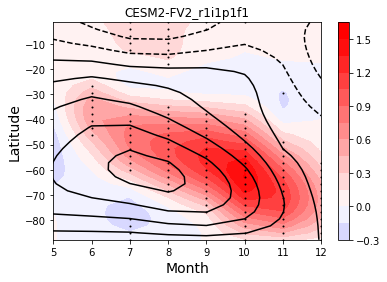

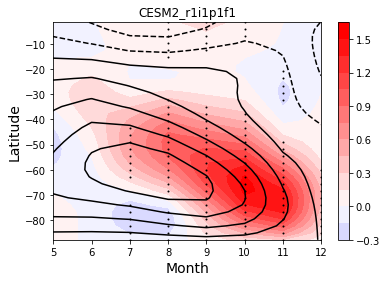

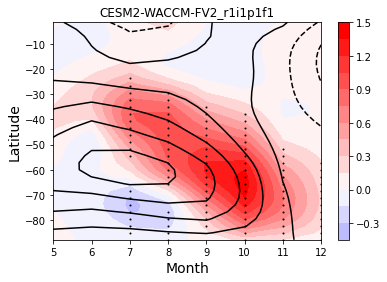

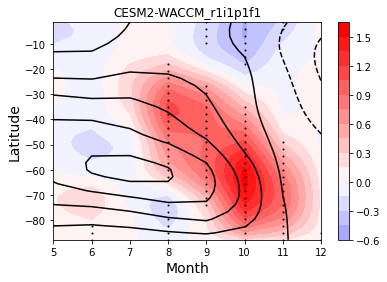

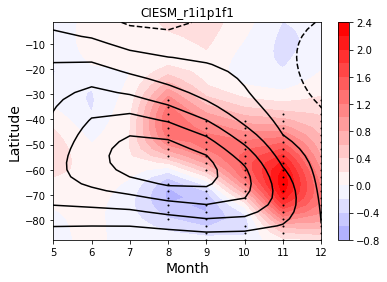

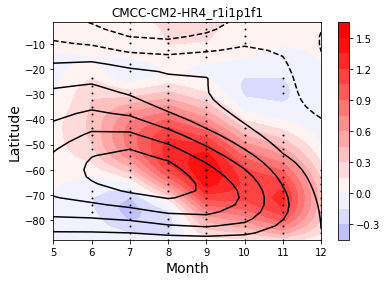

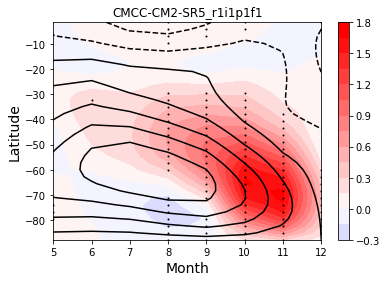

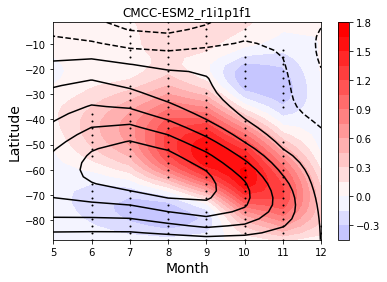

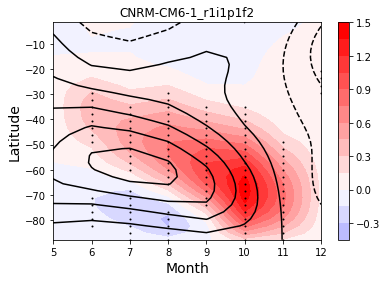

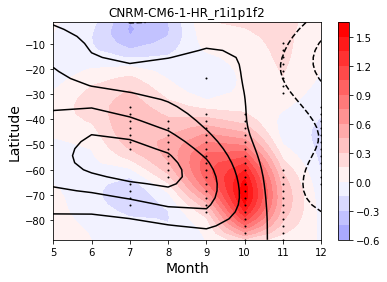

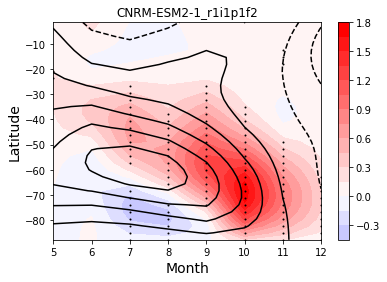

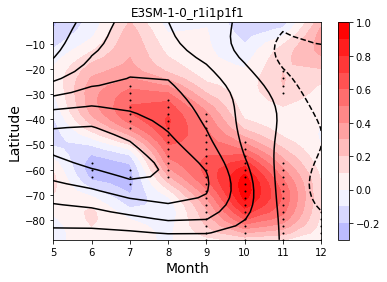

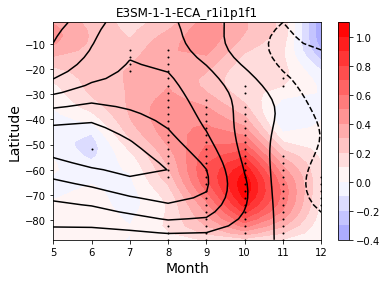

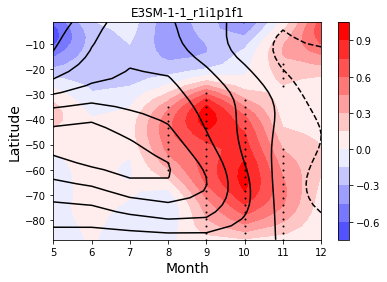

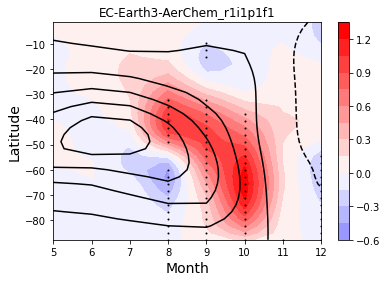

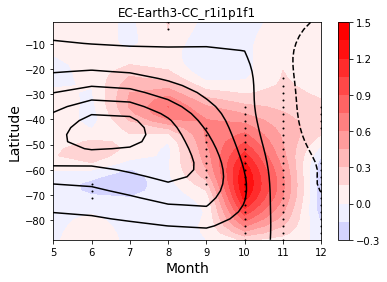

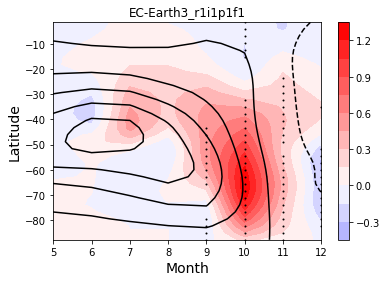

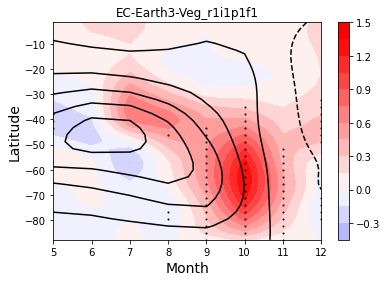

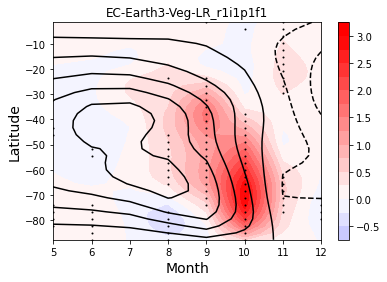

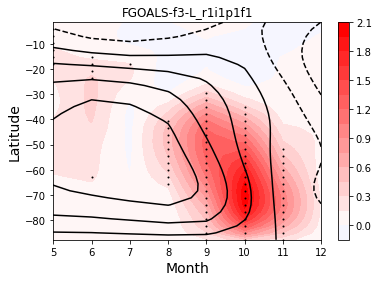

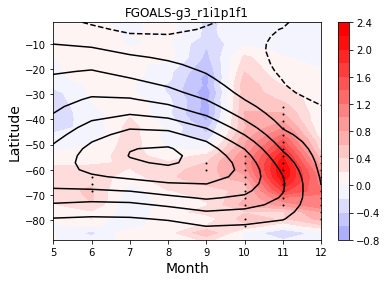

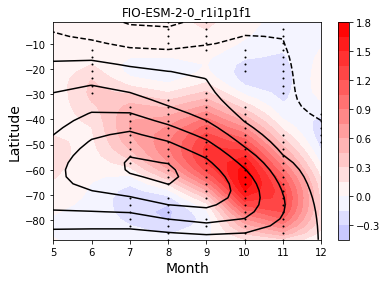

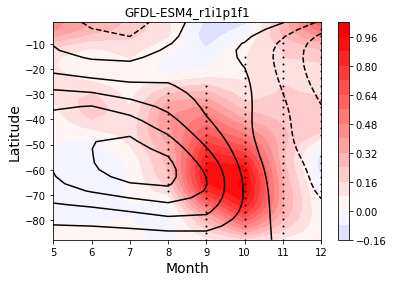

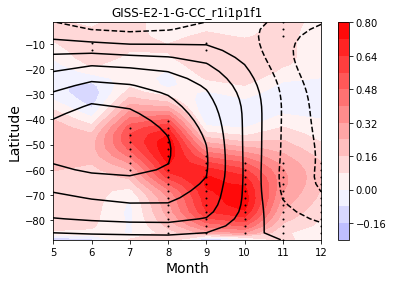

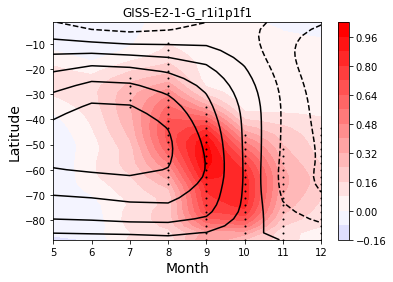

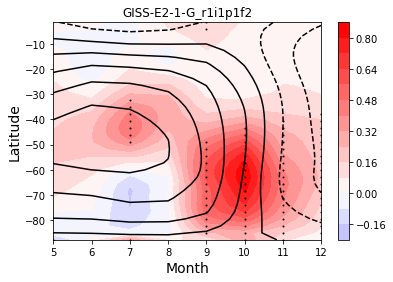

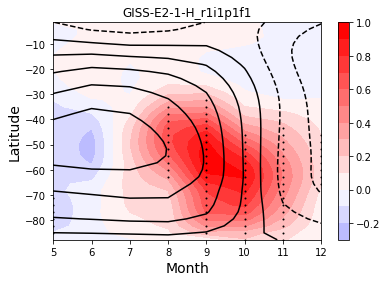

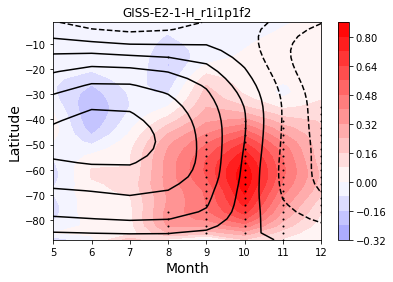

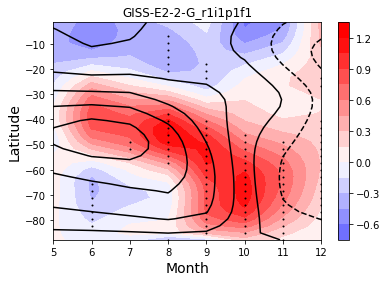

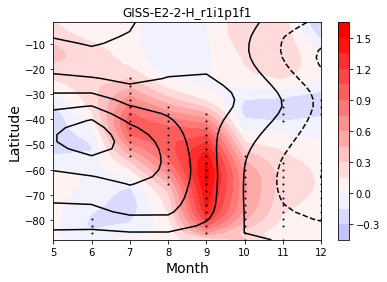

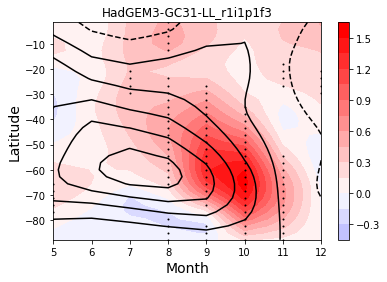

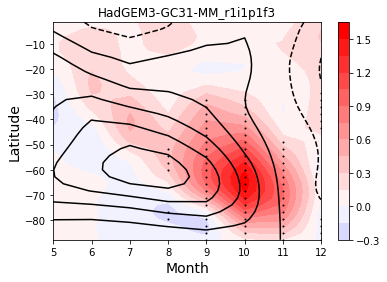

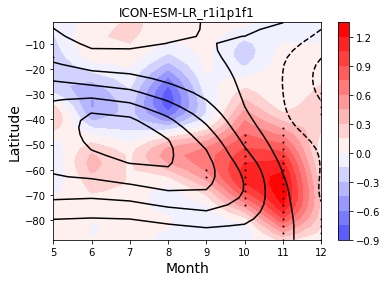

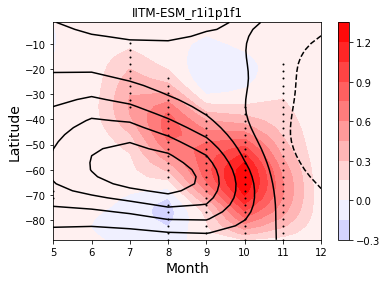

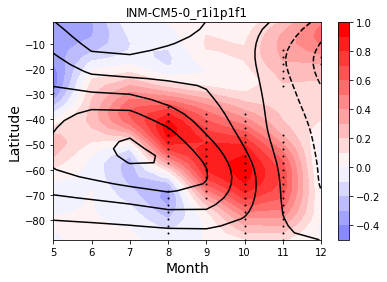

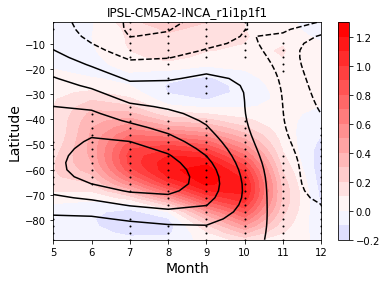

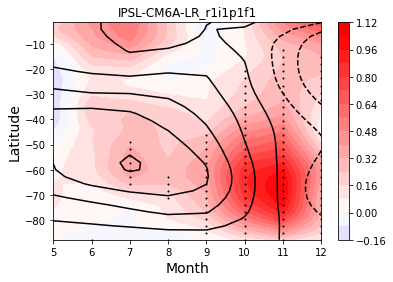

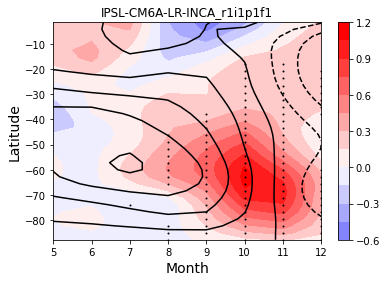

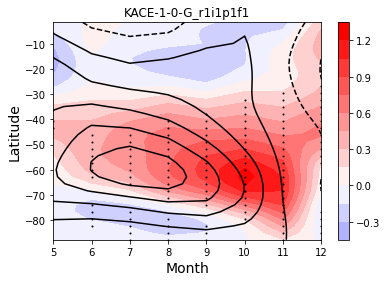

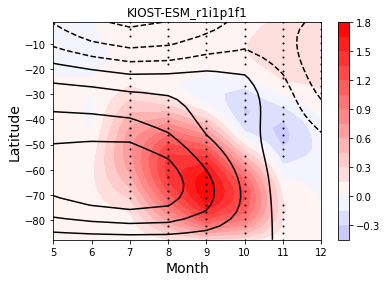

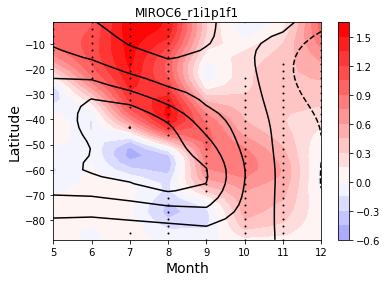

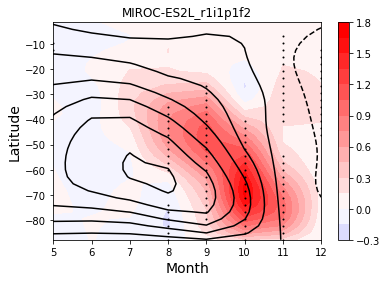

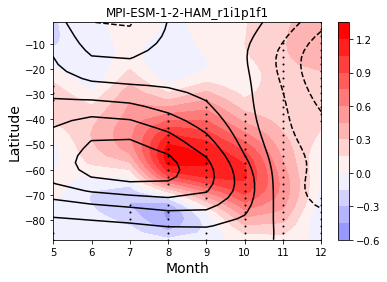

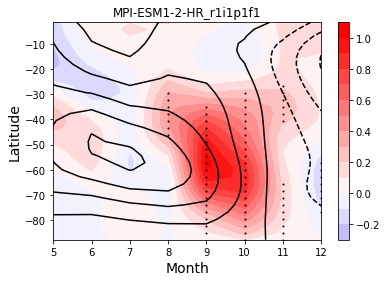

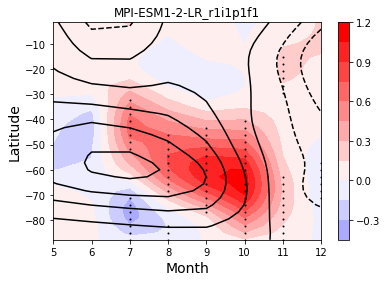

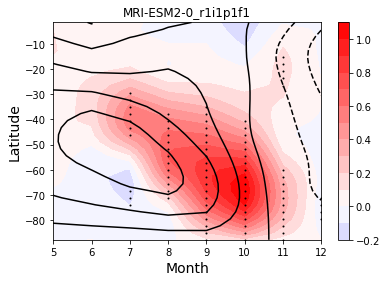

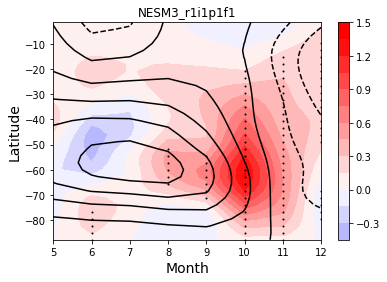

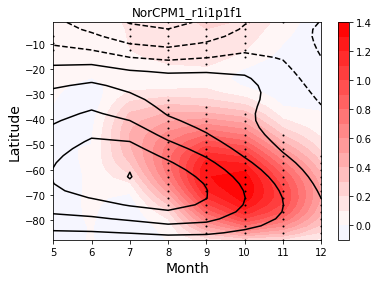

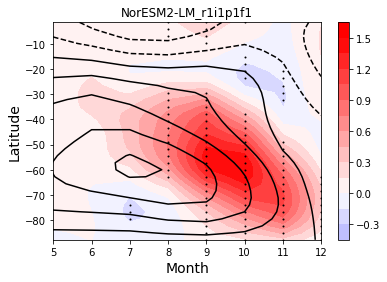

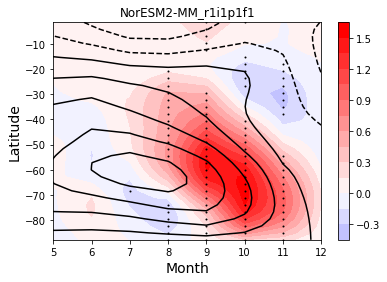

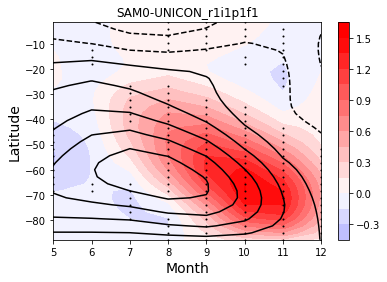

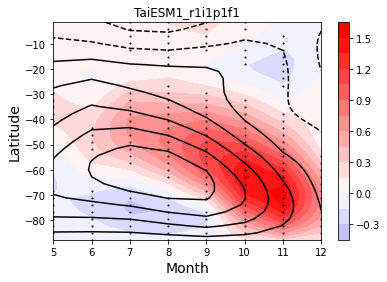

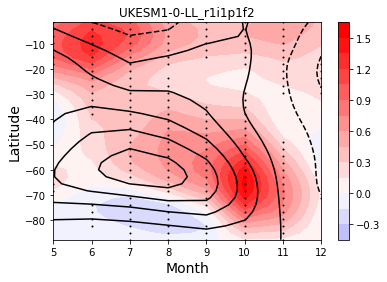

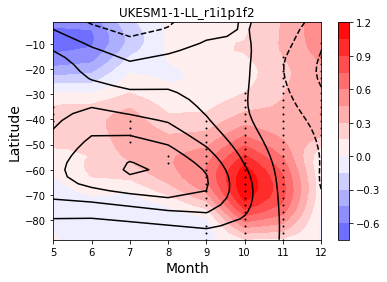

In [3]:
fig_all, ax_all = plt.subplots(8,8, figsize = (70,50))
ax_all_flat = ax_all.flatten()
for i, (name,version, grid) in enumerate(zip(model_name_list, version_name_list, grid_name_list)):
    ua1_datapath = basepath_ua1+basename_ua1.format(name,version,grid)
    ua10_datapath = basepath_ua10+basename_ua10.format(name,version, grid)
    reg_test = RegressionU1SPV(model_name = name+'_'+version, ua10_path= ua10_datapath, ua1_path=ua1_datapath)
    fig, ax  = plt.subplots()

    plot_slope_data(reg_test, ax)
    fig.savefig('Plots/UA1Reg_SPV/UA1_reg_SPV_{}.pdf'.format(reg_test.name), bbox_inches = 'tight')

    plot_slope_data(reg_test, ax_all_flat[i])
fig_all.savefig('Plots/UA1Reg_SPV/UA1_reg_SPV_AllModels.pdf', bbox_inches = 'tight')